# Exploration des données

In [2]:
import pandas as pd
import numpy as np
dataFrame=pd.read_csv("job-data.csv", encoding='latin-1')

In [3]:
dataFrame.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


In [4]:
print("number of rows :",dataFrame.shape[0])
print("number of columns :",str(dataFrame.shape[1])," === ", dataFrame.columns)

number of rows : 3198
number of columns : 8  ===  Index(['Company', 'Job Title', 'Location', 'Job Type', 'Experience level',
       'Salary', 'Requirment of the company ', 'Facilities'],
      dtype='object')


In [5]:
dataFrameColumns=dataFrame.columns
print("the data columns are :")
for i in dataFrameColumns:
    print(i)

the data columns are :
Company
Job Title
Location
Job Type
Experience level
Salary
Requirment of the company 
Facilities


In [6]:
print(dataFrame.dtypes)

Company                       object
Job Title                     object
Location                      object
Job Type                      object
Experience level              object
Salary                        object
Requirment of the company     object
Facilities                    object
dtype: object


In [7]:
dataFrame.describe()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
count,3197,3197,3197,3197,2962,3009,3198,3198
unique,1106,2138,1117,3,4,218,2600,777
top,Publicis Groupe,Data Engineer,"Bengaluru, India",Full Time,Senior-level,115K+ *,"Big Data,Business Intelligence,Data analysis,E...",",,,,"
freq,126,105,90,3116,1876,253,12,542


### Missing values

In [8]:
missing_values_count=dataFrame.isna().sum()
missing_values_count[0:8]

Company                         1
Job Title                       1
Location                        1
Job Type                        1
Experience level              236
Salary                        189
Requirment of the company       0
Facilities                      0
dtype: int64

In [9]:
total_cells = np.product(dataFrame.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)


1.676829268292683


### Unique Values

In [10]:
def number_of_unique_values(dataframe):
    columns=dataframe.columns
    print("column","====","number of unique values")

    for column in columns:
        if len(dataFrame[column].unique())< 10:
            print("====================================")

            print(column,"====",len(dataFrame[column].unique()),"--",dataFrame[column].unique())
        else:
            column_teen=dataFrame[column].unique()
            print("====================================")
            print(column,"====",len(dataFrame[column].unique()),"--",column_teen[0:5])


In [11]:
number_of_unique_values(dataFrame)

column ==== number of unique values
Company ==== 1107 -- ['SGS' 'Ocorian' 'Cricut' 'Bosch Group' 'Publicis Groupe']
Job Title ==== 2139 -- ['Clinical Data Analyst' 'AML/CFT & Data Analyst'
 'Machine Learning Engineer' 'Application Developer & Data Analyst'
 'Data Engineer Full time (Public Sector) USA']
Location ==== 1118 -- ['Richardson, TX, United States' 'Ebène, Mauritius'
 'South Jordan, UT, United States' 'Nonantola, Italy'
 'Arlington, VA, United States']
Job Type ==== 4 -- ['Full Time' 'Internship' 'Part Time' nan]
Experience level ==== 5 -- ['Entry-level' nan 'Mid-level' 'Senior-level' 'Executive-level']
Salary ==== 219 -- [' 48K+ *' ' 90K+ *' ' 108K+' ' 184K+' ' 39K+ *']
Requirment of the company  ==== 2600 -- ['Computer Science,Data quality,Genetics,Mathematics,SAS,Statistics'
 'Agile,Data management,Finance,Security,,'
 'Agile,Architecture,AWS,Computer Science,Computer Vision,Deep Learning'
 'Engineering,Industrial,Oracle,Power BI,R,R&D'
 'AWS,Azure,Computer Science,Consulti

### Duplicates

In [12]:
dataFrame.duplicated().sum()

202

### Company

In [13]:
print(dataFrame["Company"].unique(),
len(dataFrame["Company"].unique()))

['SGS' 'Ocorian' 'Cricut' ... 'DNSFilter' 'MUFG Investor Services'
 'Galileo Financial Technologies'] 1107


### Job Title

In [14]:
print(dataFrame["Job Title"].unique(),
len(dataFrame["Job Title"].unique()))

['Clinical Data Analyst' 'AML/CFT & Data Analyst'
 'Machine Learning Engineer' ...
 'Application Integration Engineer, Computer Vision Program'
 'Senior Software Engineer, Machine Learning - Ads Intelligence'
 'Data Scientist - New College Graduate'] 2139


### Location

In [15]:
print(dataFrame["Location"].unique(),
len(dataFrame["Location"].unique()))

['Richardson, TX, United States' 'Ebène, Mauritius'
 'South Jordan, UT, United States' ...
 'Chantilly, Virginia, United States'
 'Sunnyvale, CA; San Francisco, CA; New York \x85' 'Biñan, Philippines'] 1118


### Job Type

In [16]:
print(dataFrame["Job Type"].unique(),
len(dataFrame["Job Type"].unique()))

['Full Time' 'Internship' 'Part Time' nan] 4


### Experience level
       

In [17]:
print(dataFrame["Experience level"].unique(),
len(dataFrame["Experience level"].unique()))

['Entry-level' nan 'Mid-level' 'Senior-level' 'Executive-level'] 5


### Salary

the salary form 'corrency,salary,+,*' / 
if there is no corrancy its in '$'  

In [18]:
print(len(dataFrame["Salary"].unique()),"  ",dataFrame["Salary"].unique())
# get the values with the +*

219    [' 48K+ *' ' 90K+ *' ' 108K+' ' 184K+' ' 39K+ *' nan ' 140K+' ' 40K+ *'
 ' 80K+ *' ' 35K+ *' ' 62K+ *' ' 159K+' ' 97K+' ' 92K+ *' ' 129K+ *'
 ' 115K+ *' ' 44K+ *' ' 73K+ *' ' 59K+ *' ' 106K+' ' 105K+ *' ' 55K+ *'
 ' 110K+ *' ' 63K+ *' ' 49K+ *' ' 180K+' ' 127K+' ' 60K+' ' 45K+ *'
 ' 135K+' ' 69K+ *' ' 176K+' ' 65K+ *' ' 51K+ *' ' 67K+' ' 104K+' ' 105K+'
 ' 166K+' ' 131K+ *' ' 115K+' ' 43K+' ' 81K+ *' ' 96K+ *' ' 56K+ *'
 ' 130K+' ' 131K+' ' 50K+ *' ' 100K+' ' 60K+ *' ' 52K+' ' 135K+ *' ' 76K+'
 ' 172K+' ' 119K+' ' 125K+' ' 116K+' ' 77K+ *' ' 74K+ *' ' 70K+ *'
 ' 120K+' ' 189K+' ' 149K+' ' 110K+' ' 90K+' ' 30K+ *' ' 167K+' ' 236K+'
 ' 179K+' ' 80K+' ' 200K+' ' 139K+' ' 129K+' ' 113K+' ' 150K+' ' 158K+'
 ' 40K+' ' 184K+ *' ' 133K+' ' 78K+' ' 36K+ *' ' 122K+ *' ' 81K+' ' 59K+'
 'EUR 81K' ' 190K+' ' 72K+' ' 136K+' ' 102K+ *' ' 31K+ *' ' 89K+ *'
 ' 156K+' ' 107K+' ' 199K+' ' 224K+' ' 142K+' 'GBP 35K' ' 183K+' ' 164K+'
 'EUR 130K+' ' 174K+' ' 84K+' ' 79K+' ' 103K+ *' ' 143K+' ' 175K+'

### Requirment of the company 

In [19]:
print(len(dataFrame["Requirment of the company "].unique()),"  ",dataFrame["Requirment of the company "].unique())

2600    ['Computer Science,Data quality,Genetics,Mathematics,SAS,Statistics'
 'Agile,Data management,Finance,Security,,'
 'Agile,Architecture,AWS,Computer Science,Computer Vision,Deep Learning'
 ...
 'Computer Science,Data analysis,Engineering,Excel,Feature engineering,Keras'
 'APIs,Clustering,Computer Science,Data visualization,Deep Learning,Docker'
 'Computer Science,Data Analytics,Data Mining,Economics,Engineering,GCP']


###  Facilities

In [20]:
print(len(dataFrame["Facilities"].unique()),"  ",dataFrame["Facilities"].unique())

777    [',,,,' 'Career development,,,,'
 'Flex hours,Flex vacation,Parental leave,Unlimited paid time off,'
 '401(k) matching,Career development,Competitive pay,Equity,Flex hours'
 'Gear,,,,'
 'Career development,Competitive pay,Equity,Flex vacation,Health care'
 'Career development,Medical leave,Salary bonus,Startup environment,'
 'Career development,Health care,Medical leave,,'
 'Career development,Startup environment,,,' 'Flex hours,,,,'
 'Team events,,,,'
 'Career development,Competitive pay,Health care,Salary bonus,'
 'Flex hours,Flex vacation,Home office stipend,Parental leave,Startup environment'
 'Competitive pay,Equity,Health care,Insurance,'
 'Career development,Equity,Fitness / gym,Home office stipend,Relocation support'
 'Career development,Flex hours,,,' 'Career development,Team events,,,'
 'Career development,Flex hours,Health care,,' 'Health care,,,,'
 'Career development,Flex vacation,,,' 'Fitness / gym,,,,'
 'Career development,Flex hours,Health care,Startup environmen


On essaie d'afficher les premières lignes de notre dataset pour juste connaître sa forme.
<ul>
<li>Les valeurs NAN</li>
<p>Est-ce qu'on peut remplir ces valeurs ? Ou bien faut-il les supprimer ?</p>
<li>Liste des <strong>facilities</strong></li>
<p>Une liste qu'on peut séparer</p>
<li>Forme de <strong>salary</strong> "48K+*"</li>
<p>Des salaires avec des étoiles, quelle est la signification de ces étoiles ? On remarque qu'on a des salaires sans "*".</p>
<p>On remarque que les salaires sont en différentes devises, il faut les unifier (€, £, $).</p>

<li>Les <strong>job titles</strong> sont dans différentes langues, il faut les unifier soit en anglais, soit en français.</li>

<li>Les <strong>locations</strong> vont être divisées par ville, état, pays.</li>
</ul>

### language check

other languages existence in the df.

In [21]:
def detect_language_with_langdetect(line): 
    from langdetect import detect_langs
    try: 
        langs = detect_langs(line) 
        for item in langs: 
            # The first one returned is usually the one that has the highest probability
            return item.lang
    except: return "err"


In [22]:
prob_lang=list(map(detect_language_with_langdetect,dataFrame['Job Title'].to_list()))

In [23]:
unique_langs=set(prob_lang)

In [24]:
unique_langs

{'af',
 'ca',
 'da',
 'de',
 'en',
 'err',
 'es',
 'et',
 'fi',
 'fr',
 'id',
 'it',
 'lt',
 'nl',
 'no',
 'pl',
 'pt',
 'ro',
 'sl',
 'sv',
 'tl',
 'tr'}

In [25]:
import pandas as pd
import langdetect
import re



def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def is_english(text):
    if not isinstance(text, str):
        return False
    try:
        text = remove_emoji(text)
        lang = langdetect.detect(text)
        return lang == 'en'
    except langdetect.LangDetectException:
        return False

# Apply the function to create a new column
dataFrame['Is English'] = dataFrame['Job Title'].apply(is_english)

# Calculate counts
english_count = dataFrame['Is English'].sum()
total_count = len(dataFrame)
other_count = total_count - english_count

# Calculate percentages
english_percentage = english_count / total_count * 100
other_percentage = other_count / total_count * 100

print(f"English: {english_percentage:.2f}%, Other: {other_percentage:.2f}%")


English: 64.88%, Other: 35.12%


# Data Cleaning

In [26]:
print("list of unique Salary :",dataFrame["Salary"].sort_values(ascending=False).unique().tolist())

list of unique Salary : ['GBP 80K+', 'GBP 65K+', 'GBP 60K+', 'GBP 55K+', 'GBP 55K', 'GBP 54K+', 'GBP 51K+', 'GBP 50K+', 'GBP 45K+', 'GBP 42K+', 'GBP 35K', 'EUR 81K', 'EUR 80K+', 'EUR 60K+', 'EUR 36K+', 'EUR 130K+', ' 99K+', ' 98K+', ' 97K+', ' 96K+ *', ' 96K+', ' 95K+ *', ' 95K+', ' 94K+', ' 93K+', ' 92K+ *', ' 90K+ *', ' 90K+', ' 89K+ *', ' 86K+', ' 85K+', ' 84K+', ' 83K+', ' 82K+', ' 81K+ *', ' 81K+', ' 80K+ *', ' 80K+', ' 79K+', ' 78K+', ' 77K+ *', ' 76K+', ' 75K+ *', ' 75K+', ' 74K+ *', ' 74K+', ' 73K+ *', ' 73K+', ' 72K+', ' 71K+', ' 70K+ *', ' 70K+', ' 69K+ *', ' 68K+', ' 67K+', ' 66K+ *', ' 66K+', ' 65K+ *', ' 65K+', ' 63K+ *', ' 63K+', ' 62K+ *', ' 61K+ *', ' 60K+ *', ' 60K+', ' 59K+ *', ' 59K+', ' 57K+ *', ' 56K+ *', ' 55K+ *', ' 55K+', ' 54K+ *', ' 52K+', ' 51K+ *', ' 51K+', ' 50K+ *', ' 50K+', ' 49K+ *', ' 48K+ *', ' 45K+ *', ' 45K+', ' 44K+ *', ' 43K+', ' 42K+ *', ' 40K+ *', ' 40K+', ' 39K+ *', ' 36K+ *', ' 35K+ *', ' 33K+ *', ' 31K+ *', ' 315K+', ' 310K+', ' 30K+ *', ' 295

## Duplicates

In [30]:
# delete and check of duplicates :
dataFrame.drop_duplicates(inplace=True)
dataFrame.duplicated().sum()

0

## Handling Missing Values

### Salary

In [48]:
print("Number of messing values in the salary :",dataFrame[dataFrame["Salary"].isna()].shape[0])

Number of messing values in the salary : 175


In [43]:
dataFrame[(dataFrame["Experience level"]=="Entry-level") & ( dataFrame["Salary"].isna()) ]

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities,Is English
7,NielsenIQ,Intern (Business Intelligence Service Support),"Bangkok, Thailand",Internship,Entry-level,NaN,"Business Intelligence,Excel,Genetics,,,",",,,,",True
8,Western Digital,Summer 2023 Data Engineering Intern,"San Jose, CA, United States",Internship,Entry-level,NaN,"Big Data,Computer Science,Engineering,Machine ...","Career development,Competitive pay,Equity,Flex...",False
44,REWE International Dienstleistungsgesellschaft...,Junior Data Science Engineer (m/w/x),"Wien, Austria",Full Time,Entry-level,NaN,"CI/CD,Computer Science,Data pipelines,Deep Lea...",",,,,",True
75,Metiora,Data Analyst Intern,"Madrid, Spain",Full Time,Entry-level,NaN,"Matplotlib,MongoDB,NumPy,Pandas,Power BI,Python",",,,,",True
170,Wallbox,Analytics Engineer Intern,"Barcelona, Catalonia, Spain",Internship,Entry-level,NaN,"Airflow,BigQuery,CI/CD,Databricks,Data quality...","Career development,Flex hours,Team events,,",True
...,...,...,...,...,...,...,...,...,...
3107,Barbaricum,AI Intern (ChatGPT Specialist),Remote,Internship,Entry-level,NaN,"APIs,ChatGPT,Engineering,GPT,GPT-3,GPT-4","Career development,,,,",True
3109,METRO/MAKRO,STAGE 6 mois - Data Scientist Junior H/F,"Nanterre, France",Full Time,Entry-level,NaN,"Big Data,Power BI,Python,R,SQL,",",,,,",True
3134,Junglee Games,ETL and Data Warehouse Testing Intern,"Bengaluru, Karnataka, India",Internship,Entry-level,NaN,"Computer Science,Data quality,Data warehouse,E...",",,,,",True
3152,Lely,"Stage: Computer Science, Robotics, Computer Vi...","Maassluis, Netherlands",Full Time,Entry-level,NaN,"Computer Science,Computer Vision,Engineering,O...",",,,,",True


In [50]:
dataFrame[(dataFrame["Experience level"]!="Entry-level") & ( dataFrame["Salary"].isna())]

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities,Is English
39,Angi,Senior Data Scientist,"Indianapolis, IN - Hybrid",Full Time,Senior-level,NaN,"Big Data,Data Mining,Machine Learning,Mathemat...","401(k) matching,Career development,Competitive...",False
87,Civis Analytics,Lead Applied Data Scientist (Experience with M...,Remote,Full Time,Senior-level,NaN,"Causal inference,Computer Science,Consulting,D...","401(k) matching,Career development,Competitive...",True
168,Faraday Future,Senior Big Data Engineer,"San Jose, California, United States",Full Time,Senior-level,NaN,"Airflow,AWS,Azure,Big Data,Computer Science,Da...","Equity,Relocation support,,,",True
201,Veritone,Data Analytics Engineer,United States,Full Time,Senior-level,NaN,"Agile,APIs,AWS,Business Analytics,Business Int...","401(k) matching,Career development,Competitive...",True
208,Publicis Groupe,Senior Associate Data Engineering,"Houston, TX, United States",Full Time,Mid-level,NaN,"Agile,Architecture,AWS,Azure,BigQuery,Bigtable","Career development,Flex hours,Flex vacation,Pa...",True
...,...,...,...,...,...,...,...,...,...
2896,Zappi,Data Scientist,"London, England, United Kingdom",Full Time,Mid-level,NaN,"APIs,AWS,CI/CD,Computer Vision,Data Mining,Eng...","Career development,Flex hours,Flex vacation,Ho...",False
2936,ComplyAdvantage,Director of Data Science,"London, England, United Kingdom",Full Time,Executive-level,NaN,"Data strategy,Engineering,Machine Learning,NLP...","Career development,Competitive pay,Equity,Flex...",True
3080,DuckDuckGo,"Senior Backend Engineer, AI",Remote job,Full Time,Senior-level,NaN,"Engineering,Genetics,Machine Learning,ML model...","Career development,Equity,Flex hours,Flex vaca...",False
3099,NBCUniversal,"Data Scientist, Data & Analytics","New York City, United States",Full Time,Senior-level,NaN,"Agile,Airflow,Architecture,AWS,Azure,CI/CD","Career development,Health care,Insurance,Medic...",True


#### Number of NaN Values in Salary by Experience Level

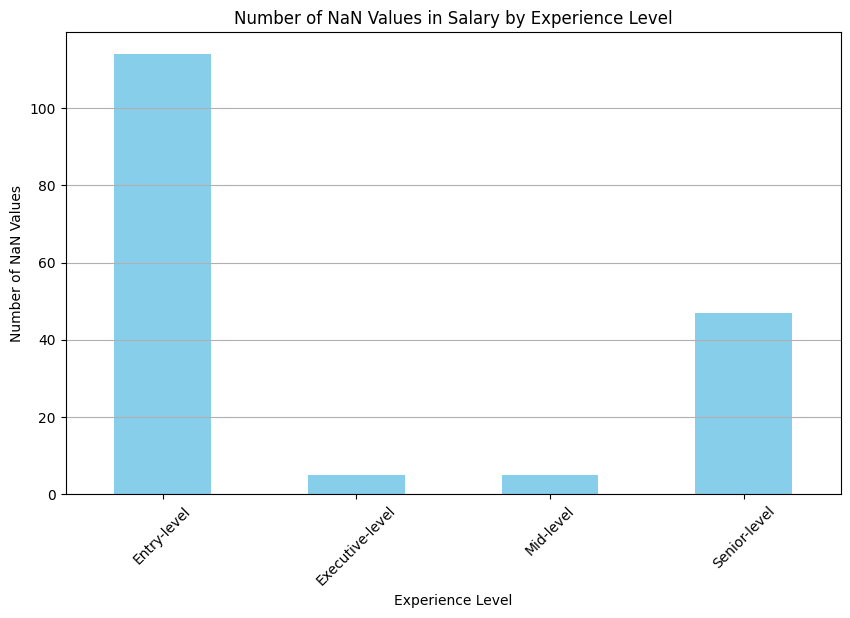

In [51]:
import matplotlib.pyplot as plt

nan_counts = dataFrame['Salary'].isna().groupby(dataFrame['Experience level']).sum()

nan_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Number of NaN Values in Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()